In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets

from torch.utils.data import TensorDataset

from torch.utils.data import DataLoader

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.ticker as ticker
import locale

locale.setlocale(locale.LC_ALL, 'de_DE')

'de_DE'

In [3]:
lang = 'en'

In [4]:
plt.rcParams["font.family"] = 'Djvu Serif'

plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.unicode'] = True

plt.rcParams['text.latex.preamble'] = [r'\usepackage[utf8x]{inputenc}', 
                                       r'\usepackage[english,russian]{babel}', 
                                       r'\usepackage{amsmath}']

In [5]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

plt.rcParams['axes.formatter.use_locale'] = True

In [6]:
class Student(nn.Module):
    def __init__(self, input_dim = 784, output_dim = 10, device = 'cpu'):
        super(Student, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        self.linear = nn.Linear(input_dim, output_dim)
        
        self.to(device)
        
    def forward(self, input):
        out = self.linear(input)
        return out
    
class Teacher(nn.Module):
    def __init__(self, device = 'cpu'):
        super(Teacher, self).__init__()
        
        output_dim = 10

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size = 5)
        self.conv2 = nn.Conv2d(3, 9, kernel_size = 5)
        self.linear1 = nn.Linear(9*4*4, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, output_dim)
        
        self.to(device)
        
    def forward(self, input):
        out = self.conv1(input)
        out = F.relu(out)
        out = F.max_pool2d(out, kernel_size = 2)
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, kernel_size = 2)
        
        out = out.view(out.shape[0], -1)
        
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        return out

In [7]:
with open('./dumps/list_of_student_models', 'rb') as f:
    list_of_student_models = pickle.load(f)
    
with open('./dumps/list_of_losses_train', 'rb') as f:
    list_of_losses_train = pickle.load(f)
    
with open('./dumps/list_of_losses_test', 'rb') as f:
    list_of_losses_test = pickle.load(f)
    
with open('./dumps/list_of_acc_train', 'rb') as f:
    list_of_acc_train = pickle.load(f)
    
with open('./dumps/list_of_acc_test', 'rb') as f:
    list_of_acc_test = pickle.load(f)

In [8]:
with open('./dumps/list_of_student_models_dist', 'rb') as f:
    list_of_student_models_dist = pickle.load(f)
    
with open('./dumps/list_of_losses_train_dist', 'rb') as f:
    list_of_losses_train_dist = pickle.load(f)
    
with open('./dumps/list_of_losses_test_dist', 'rb') as f:
    list_of_losses_test_dist = pickle.load(f)
    
with open('./dumps/list_of_acc_train_dist', 'rb') as f:
    list_of_acc_train_dist = pickle.load(f)
    
with open('./dumps/list_of_acc_test_dist', 'rb') as f:
    list_of_acc_test_dist = pickle.load(f)

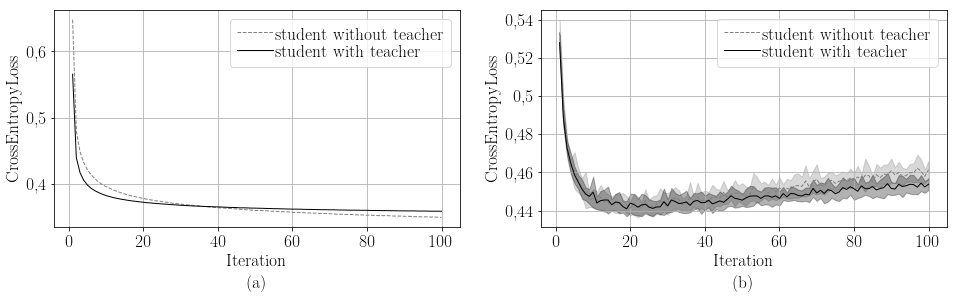

In [14]:
Text_size = 18

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16, 4)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################

fig = plt.figure()

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.3n}'))
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2n}'))
    
# Train part
mean = np.array(list_of_losses_train).mean(0)
std = np.array(list_of_losses_train).std(0)
x_axis = np.arange(1, len(mean)+1)

ax[0].plot(x_axis, mean, '--',color = 'gray', label = 'student without teacher')
# ax[0].fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'blue')


mean = np.array(list_of_losses_train_dist).mean(0)
std = np.array(list_of_losses_train_dist).std(0)
x_axis = np.arange(1, len(mean)+1)

ax[0].plot(x_axis, mean, color = 'black', label = 'student with teacher')
# ax[0].fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'green')


ax[0].set_title('(a)', y=-0.3)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('CrossEntropyLoss')

ax[0].grid()
ax[0].legend(loc='best')

# Test part
mean = np.array(list_of_losses_test).mean(0)
std = np.array(list_of_losses_test).std(0)
x_axis = np.arange(1, len(mean)+1)

ax[1].plot(x_axis, mean, '--', color = 'gray', label = 'student without teacher')
ax[1].fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'gray')

mean = np.array(list_of_losses_test_dist).mean(0)
std = np.array(list_of_losses_test_dist).std(0)
x_axis = np.arange(1, len(mean)+1)

ax[1].plot(x_axis, mean, color = 'black', label = 'student with teacher')
ax[1].fill_between(x_axis, mean - std, mean + std, alpha = 0.3, color = 'black')

ax[1].set_title('(b)', y=-0.3)
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('CrossEntropyLoss')

ax[1].grid()
ax[1].legend(loc='best')


plt.savefig('./figures/mnist_loss.pdf', bbox_inches='tight')
plt.show()

In [ ]:
with open('./dumps/DICT.pkl', 'rb') as f:
    DICT = pickle.load(f)

In [ ]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (24, 16)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
####################################################

fig = plt.figure()

gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1])

if lang == 'en':
    cols = ['First Class', 'Second Class', 'Third Class']
elif lang == 'ru':
    cols = ['Класс один', 'Класс два', 'Класс три']
    
if lang == 'en':
    rows = ['Test object five', 'Test object nine', 'Test object seventeen']
elif lang == 'ru':
    rows = ['Объект номер пять', 'Объект номер девять', 'Объект номер семнадцать']

ax = []
for i in range(9):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.3n}'))
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2n}'))
    
    if i % 3 == 0:
        ax[-1].annotate(rows[i//3], xy=(0, 0.5), xytext=(-ax[i].yaxis.labelpad - 24, 0),
                        xycoords=ax[i].yaxis.label, textcoords='offset points',
                        size='large', ha='center', va='center', rotation=90)
        
    

TITLES = [['(a)', '(b)', '(c)'], ['(d)', '(f)', '(g)'], ['(h)', '(i)', '(j)']]


for i, object_num in enumerate([4, 8, 16]):
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 0]

    # ax = plt.gca()
    im = ax[3*i+0].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+0], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+0].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+0].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+0].set_title(TITLES[i][0] + ' ' + cols[0], y=-0.35)
    else:
        ax[3*i+0].set_title(TITLES[i][0], y=-0.35)
    
    ax[3*i+0].set_ylabel('T')
    ax[3*i+0].set_xlabel('$\lambda$')

    # Second class
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 1]

    # ax = plt.gca()
    im = ax[3*i+1].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+1], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+1].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+1].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+1].set_title(TITLES[i][1] + ' ' + cols[1], y=-0.35)
    else:
        ax[3*i+1].set_title(TITLES[i][1], y=-0.35)
    
    ax[3*i+1].set_ylabel('T')
    ax[3*i+1].set_xlabel('$\lambda$')

    # Third class
    mat = np.zeros([6, 11])

    for iT, T in enumerate([0.25, 0.5, 1, 2, 4, 8]):
        for ilamb, lamb in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
            mat[iT, ilamb] = np.mean(DICT[T][lamb]['list_of_predicts_dist'], axis = 0)[-1, object_num, 2]

    # ax = plt.gca()
    im = ax[3*i+2].imshow(mat, 
                     cmap='gray', 
                     interpolation='none', 
                     aspect="auto",
                    )
    _ = fig.colorbar(im, ax=ax[3*i+2], format=ticker.StrMethodFormatter('{x:.2n}'))
    ax[3*i+2].set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[3*i+2].set_yticklabels([0, 0.25, 0.5, 1, 2, 4, 8])

    if i == 2:
        ax[3*i+2].set_title(TITLES[i][2] + ' ' + cols[2], y=-0.35)
    else:
        ax[3*i+2].set_title(TITLES[i][2], y=-0.35)
    
    ax[3*i+2].set_ylabel('T')
    ax[3*i+2].set_xlabel('$\lambda$')
    
plt.subplots_adjust(wspace=0.25, hspace=0.4)

plt.savefig('./figures/syn_T_lambda.jpg'.format(object_num), bbox_inches='tight')

plt.show()